### import libraries

In [6]:
import torch
import torch.nn as nn
import torchvision
import torchsummary
import preprocessing
import cnn
import matplotlib.pyplot as plt

### set device

In [7]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### set hyperparameters

In [8]:
#in_channels = 1    # 28x28 = 784, size of MNIST images (grayscale)
#hidden_size = 100
num_classes = 24
learning_rate = 0.001
batch_size = 64
num_epochs = 20

### preprocess data using custom Dataset

In [9]:
my_transforms = torchvision.transforms.Compose([
    preprocessing.ToTensor(), 
])

training_data = preprocessing.SignDataset(csv_path="data/sign_mnist_train.csv", transform=my_transforms)
test_data = preprocessing.SignDataset(csv_path="data/sign_mnist_test.csv", transform=my_transforms)

### vislualizing the Dataset

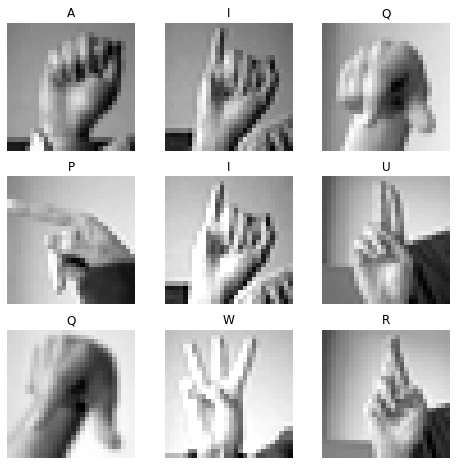

In [10]:
labels_map = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 
    6: "G", 7: "H", 8: "I", 9: "K", 10: "L", 11: "M",
    12: "N", 13: "O", 14: "P", 15: "Q", 16: "R", 17: "S",
    18: "T", 19: "U", 20: "V", 21: "W", 22: "X", 23: "Y",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label.item()])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### DataLoader

In [11]:
train_dataloader = torch.utils.data.DataLoader(dataset=training_data, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

### iterate through the DataLoader

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape  : torch.Size([64])


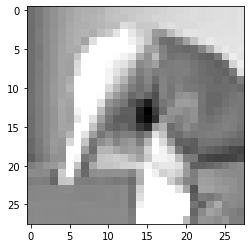

Label: Q


In [12]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape : {train_features.size()}")
print(f"Labels batch shape  : {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

### data summary

In [13]:
print('type(train_dataloader):', type(train_dataloader))
print('----------------------------------')
print('data_iter = iter(train_dataloader)')
data_iter = iter(train_dataloader)
print('----------------------------------')
print('single_batch = data_iter.next()')
single_batch = data_iter.next()
print('type(single_batch) :', type(single_batch))
#print('len(single_batch)  :', len(single_batch))
print('----------------------------------')
print('images, labels = single_batch')
images, labels = single_batch
print('images.shape:', images.shape)
print('labels.shape:', labels.shape)
print('type(labels[0]):', type(labels[0]))

type(train_dataloader): <class 'torch.utils.data.dataloader.DataLoader'>
----------------------------------
data_iter = iter(train_dataloader)
----------------------------------
single_batch = data_iter.next()
type(single_batch) : <class 'list'>
----------------------------------
images, labels = single_batch
images.shape: torch.Size([64, 1, 28, 28])
labels.shape: torch.Size([64])
type(labels[0]): <class 'torch.Tensor'>


### Initialize network

In [14]:
# Create the network and look at it's text representation
net = cnn.ConvNN().to(device)
torchsummary.summary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
         MaxPool2d-2           [-1, 10, 13, 13]               0
            Conv2d-3           [-1, 20, 11, 11]           1,820
         MaxPool2d-4             [-1, 20, 5, 5]               0
            Conv2d-5             [-1, 30, 3, 3]           5,430
         Dropout2d-6             [-1, 30, 3, 3]               0
            Linear-7                  [-1, 270]          73,170
            Linear-8                   [-1, 24]           6,504
        LogSoftmax-9                   [-1, 24]               0
Total params: 87,024
Trainable params: 87,024
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.09
Params size (MB): 0.33
Estimated Total Size (MB): 0.43
---------------------------------------------

### train the model

In [16]:
trained_model = cnn.train(
    loader=train_dataloader, 
    model=net, 
    num_epochs=3, 
    learning_rate=learning_rate, 
    device=device
    )

epoch [1/3], batch [200/429], loss = 1.7610
epoch [1/3], batch [400/429], loss = 1.4723
epoch [2/3], batch [200/429], loss = 1.0996
epoch [2/3], batch [400/429], loss = 1.4898
epoch [3/3], batch [200/429], loss = 0.8201
epoch [3/3], batch [400/429], loss = 1.1582


### model performance

In [19]:
cnn.get_accuracy(loader=train_dataloader, model=trained_model,device=device)
cnn.get_accuracy(loader=test_dataloader, model=trained_model, device=device)

Correct: [19803 / 27455] with accuracy 72.13 %
Correct: [4023 / 7172] with accuracy 56.09 %
